<a href="https://colab.research.google.com/github/sidds4474/Bike-demand-prediction-ML/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# setting max display column limit to 20
pd.set_option("display.max_columns", 20)

#set style
plt.style.use('seaborn')


# setting font weight,label weight,title weight to bold and setting title size,label size,fontsize.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

import warnings
warnings.filterwarnings('ignore')

In [2]:
 # Mounting the google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading the data file

bike_df = pd.read_csv('/content/drive/MyDrive/Bike Sharing Demand Prediction/SeoulBikeData.csv',encoding = 'latin' )

# **Data Exploration And Data Cleaning**

In [4]:
# Check 1st Five rows
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
# Check last 5 rows
bike_df.tail(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
# Check Total rows and Columns in dataset.
# Rows= 8760
# Columns=14
print(f' The shape of dataset is {(bike_df.shape)} \n Total Rows are : {(bike_df.shape)[0]}\n Total Columns are : {(bike_df.shape)[1]}')

 The shape of dataset is (8760, 14) 
 Total Rows are : 8760
 Total Columns are : 14


In [7]:

# Check the info of dataset to know the data types of columns or variable
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

##***Observations*** 

###1)Null values/missing values- 0
###2)Date- columns need to convert into proper data type.

### 3)Columns to convert into numeric(for modelling Purpose)
  * seasons
  * holiday
  * functioning day


###4) Rename columns-
   * Temperature(°C)
   * Humidity(%)
   * Wind speed (m/s)
   * Visibility (10m)
   * Dew point temperature(°C)
   * Solar Radiation (MJ/m2)
   * Rainfall(mm)
   * Snowfall (cm)
   * Rented Bike Count,Functioning Day(Beacuse white spaces and variables having units in brackets  which makes difficult to copy variable name.)

In [8]:
# Check columns
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [9]:
#Since the variables having units with name, renaming columns for better variable analysis.
bike_df.rename(columns={'Rented Bike Count':'Rented_Bike_Count','Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Wind speed (m/s)':'Wind_speed',
                       'Visibility (10m)':'Visibility','Dew point temperature(°C)':'Dew_point_temperature', 'Solar Radiation (MJ/m2)':'Solar_Radiation',
                        'Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Functioning Day':'Functioning_Day'},inplace=True)

In [10]:
# Change The datatype of Date columns to extract 'Month' ,'Day', "year". so  further we can analyze the Bike rentals with respect to year months and days.
bike_df['Date']=bike_df['Date'].astype('datetime64[ns]')


In [11]:
# Creating new columns 'Month', 'Year' ,'Day.
bike_df['Month']=bike_df['Date'].dt.month

bike_df['Day']=bike_df['Date'].dt.day_name()                  #dt.day_name() and dt.month_name()  will give day names and month names
                                                                # dt.month will give month numbers as 1,2,3,...12 

In [12]:
#  Creating new column and Encoding with 1 if its weekend and 0 if its Weekdays.
bike_df['Weekdays_or_weekend']=bike_df['Day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

In [13]:
# check the Newly Created columns
bike_df.head(2)

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month,Day,Weekdays_or_weekend
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0


In [14]:
# Now We can Drop Day and Date columns.

bike_df.drop(['Date',"Day"],axis=1 ,inplace=True)

In [15]:
#Get distinct categories counts forSeasons categories
bike_df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [16]:
#Get distinct categories counts for Holiday categories
bike_df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [17]:
#Get distinct categories counts for Functioning_Day categories
bike_df['Functioning_Day'].value_counts()

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

In [18]:
#Get distinct categories counts for for Month categories
bike_df['Month'].value_counts()

1     744
3     744
5     744
7     744
8     744
10    744
12    744
4     720
6     720
9     720
11    720
2     672
Name: Month, dtype: int64

In [19]:
#Get distinct categories counts for for Weekdays_or_weekend categories
bike_df['Weekdays_or_weekend'].value_counts()

0    6216
1    2544
Name: Weekdays_or_weekend, dtype: int64

In [20]:
## Check the Summary of Bike data to egt mean,max,25%,50%,75% etc

bike_df.describe()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Month,Weekdays_or_weekend
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,6.526027,0.290411
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,3.448048,0.453978
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,4.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,7.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,10.000000,1.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,12.000000,1.000000


In [21]:
# check for Null values in our bike data
# as we can see we don't have any null values.
bike_df.isnull().sum()

Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
Month                    0
Weekdays_or_weekend      0
dtype: int64

Text(0.5, 1.0, ' Visualising Missing Values')

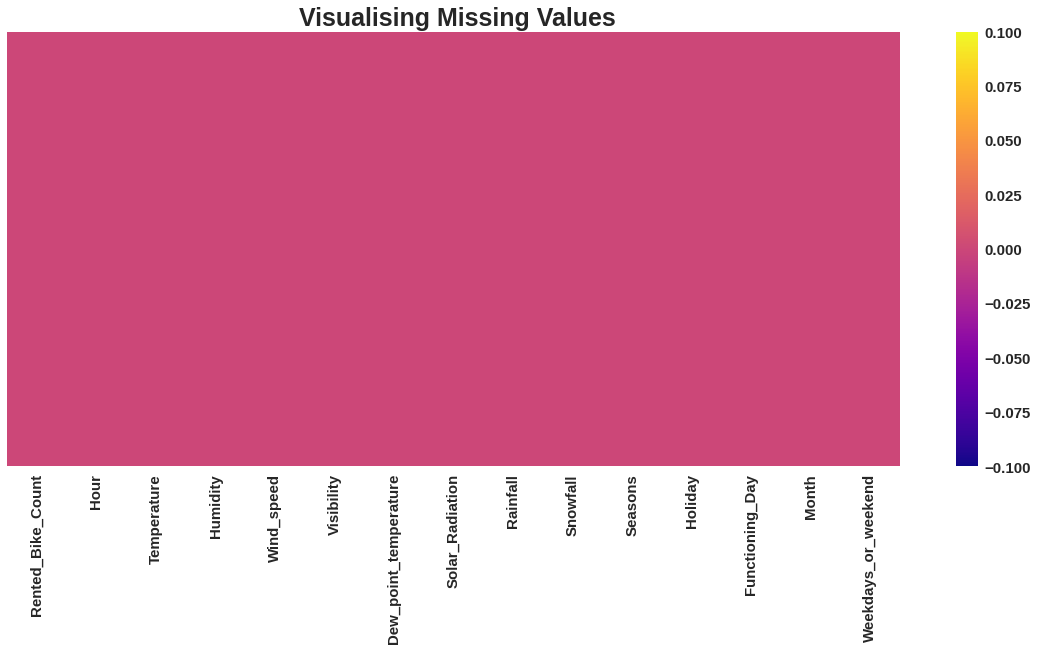

In [22]:
# Visulaizing null values using heatmap.
plt.figure(figsize=(20,8))
sns.heatmap(bike_df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

No Null values found.

In [23]:
# checking Duplicate rows in our BikeData.
duplicates=bike_df.duplicated().sum()
print(f"We have {duplicates} rows in our Bike Data.")
# No duplicate rows found

We have 0 rows in our Bike Data.


# **Exploratory Data Analysis**

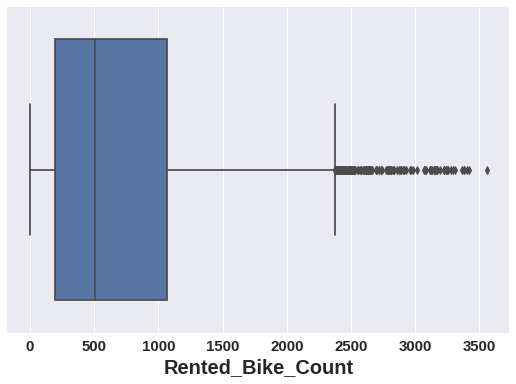

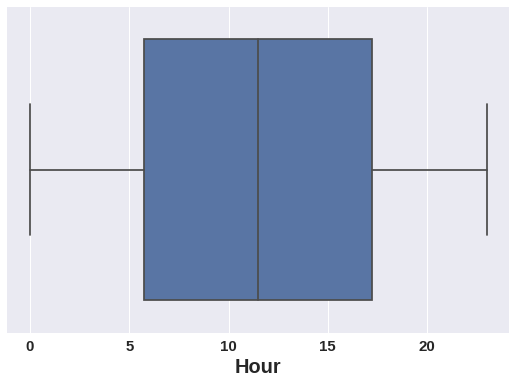

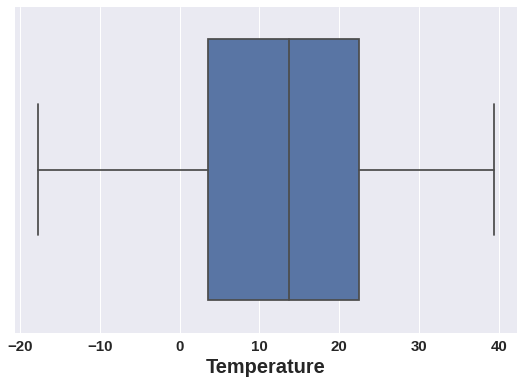

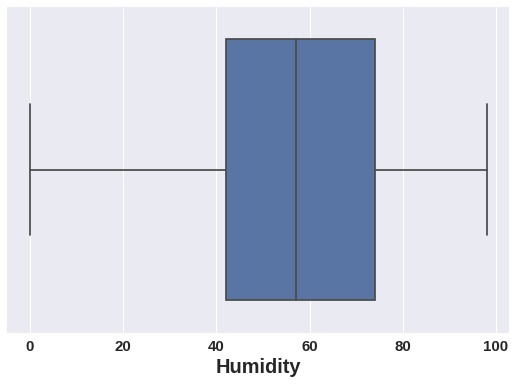

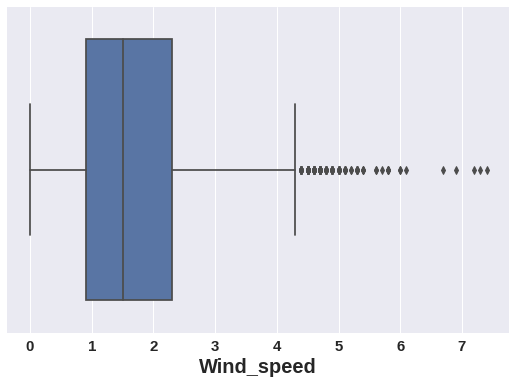

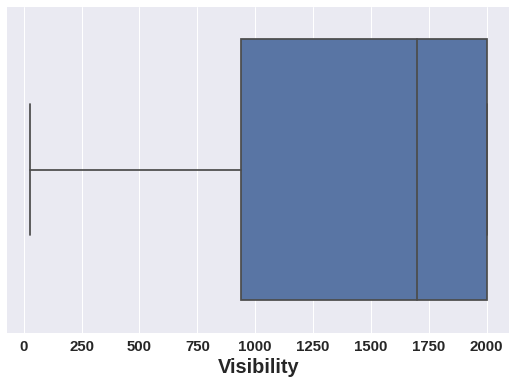

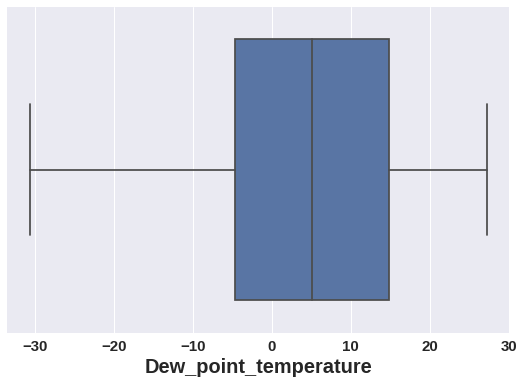

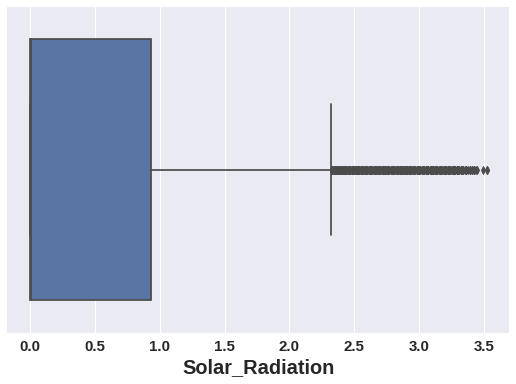

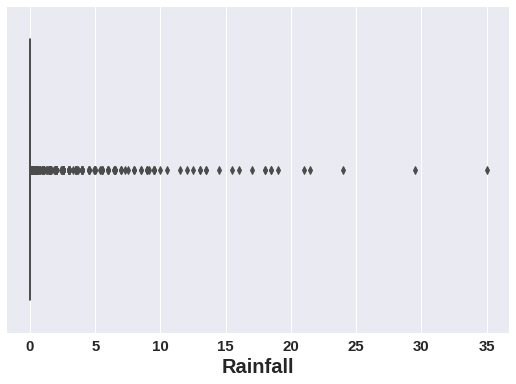

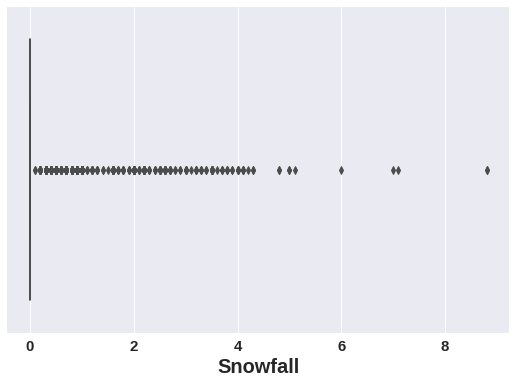

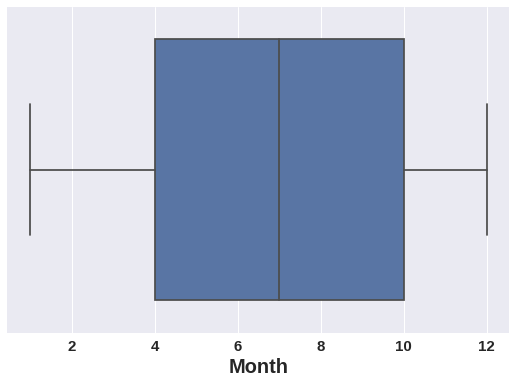

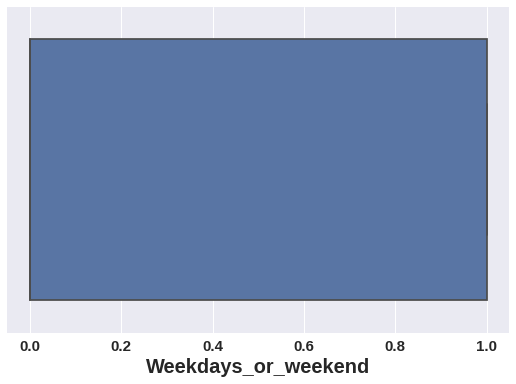

In [24]:
# create numeric columns list.
numeric_col=bike_df.describe().columns.tolist()
numeric_col

# create categorical column list
categorical_columns= list(set(bike_df.columns) - set(bike_df.describe().columns))
categorical_columns

# priting box plot of numeric columns to check oultliers
for col in numeric_col:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    sns.boxplot(x=bike_df[col])


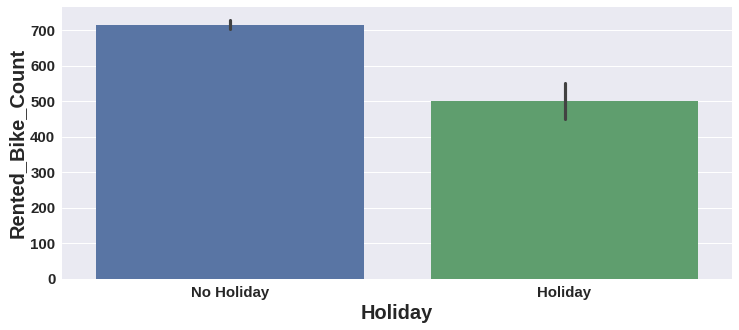

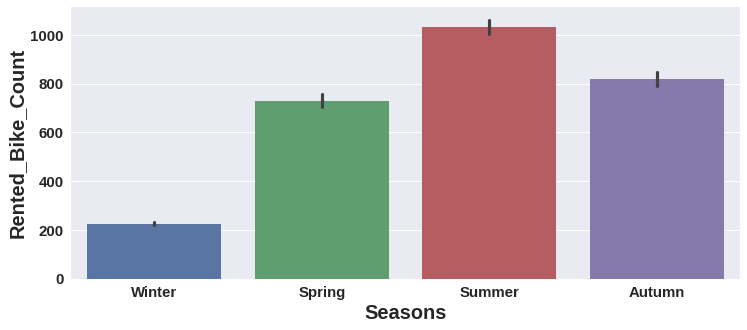

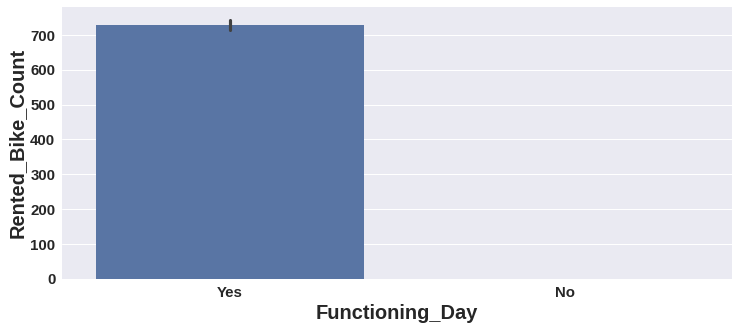

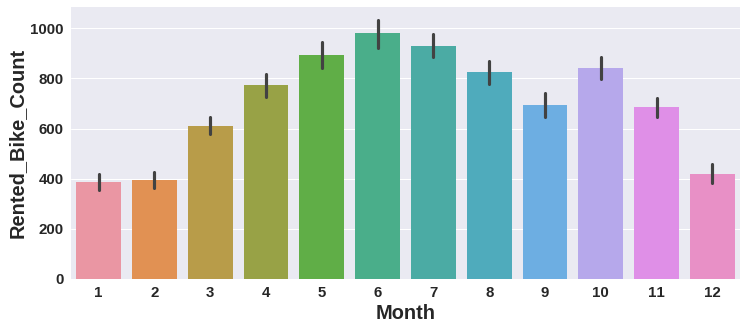

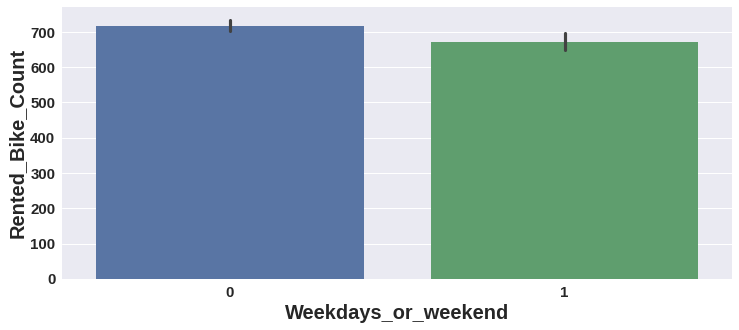

In [25]:

# adding two  more categorical columns 
categorical_columns.extend(['Month','Weekdays_or_weekend'])

# plot barchart plot for each categorical columns with respect to target variable to get insights
for col in categorical_columns:
    fig = plt.figure(figsize=(12, 5))
    ax = fig.gca()
    sns.barplot(x=bike_df[col],y=bike_df['Rented_Bike_Count'])


## **Observations From Above Barcharts:**
###***1) Summer season had the higest Bike Rent Count. People are more likely to rent bikes in summer. Bike rentals in winter is very less compared to other seasons.***
###***2) High number of bikes were rented on No Holidays.***
###***3) On no functioning day no bikes were rented. we have only 295 counts of "NO". Thus we can drop that 295 values but column having only "Yes' will not add value to our column.So these columns is not use full for us. We will drop those in next steps.***

### ***4) Most of the bikes were rented on Weekdays compared to weekends.***


### ***5) From March Bike Rent Count started increasing and it was highest in June.*** 

### **Let's check Bike Rent Count trend with respect  to Hour on Functioning days,weekends or weekdays,seasons,Holidays columns.**

Text(0.5, 1.0, 'Bike Rental Trend according to Hour on Holiday / No Holiday')

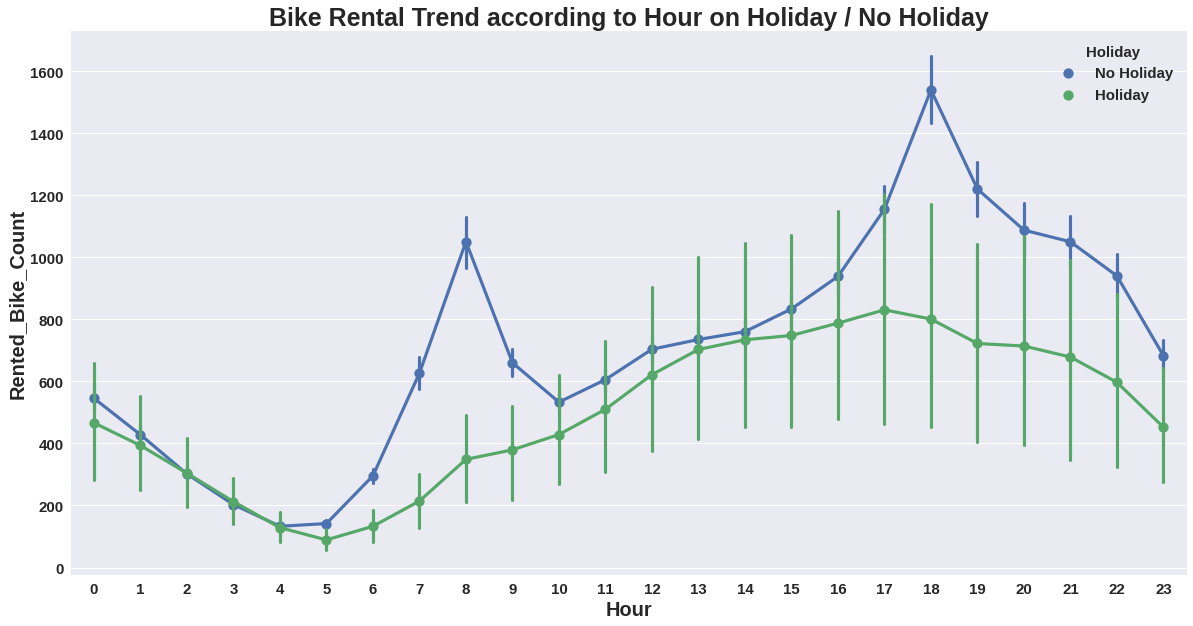

In [26]:
# Bike Rental trend with respect to Hour on Holiday or No Holiday.
plt.figure(figsize=(20,10))
sns.pointplot(x=bike_df['Hour'],y=bike_df['Rented_Bike_Count'],hue=bike_df['Holiday'])
plt.title("Bike Rental Trend according to Hour on Holiday / No Holiday")

## ***Observation***
 #### ***1)There is sudden peak between 6/7AM to 10 AM. Office time,College and going time could be the reason for this sudden peak.( NO Holiday). But on Holiday the case is different  less bike rentals happend.***
 #### ***2) Again there is peak between 10 AM to 7 PM. may be its office leaving time for the above people.( NO Holiday).*** 


Text(0.5, 1.0, 'Bike Rental Trend according to Hour on Functioning day')

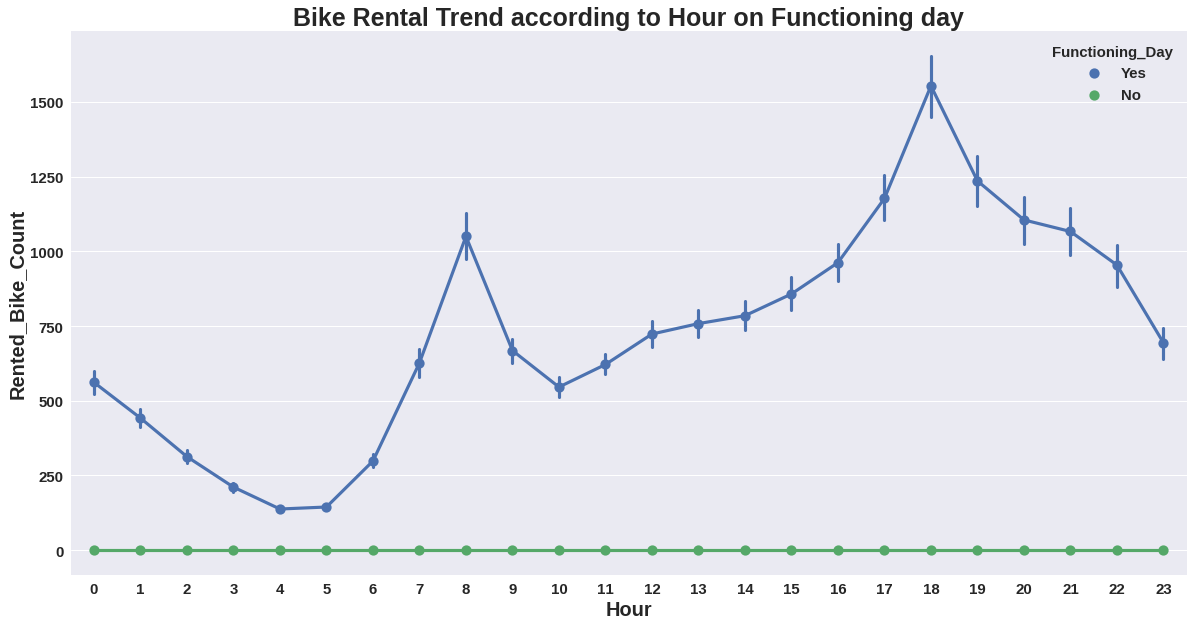

In [27]:
## Bike Rental trend with respect to Hour on Functioning day.
plt.figure(figsize=(20,10))
sns.pointplot(x=bike_df['Hour'],y=bike_df['Rented_Bike_Count'],hue=bike_df['Functioning_Day'])
plt.title("Bike Rental Trend according to Hour on Functioning day")

## ***Observation***
### ***1) Here the trend for functioning day is same as of No holiday. Only the difference is on No functioning day there is no bike rentals.***
### ***(if we drop no fucntioning day rows. we will left only with the functioning day values.thus the column having same value through out will not be helpful.***
###***So,its better to drop the column.)***

Text(0.5, 1.0, 'Bike Rental Trend according to Hour in Seasons')

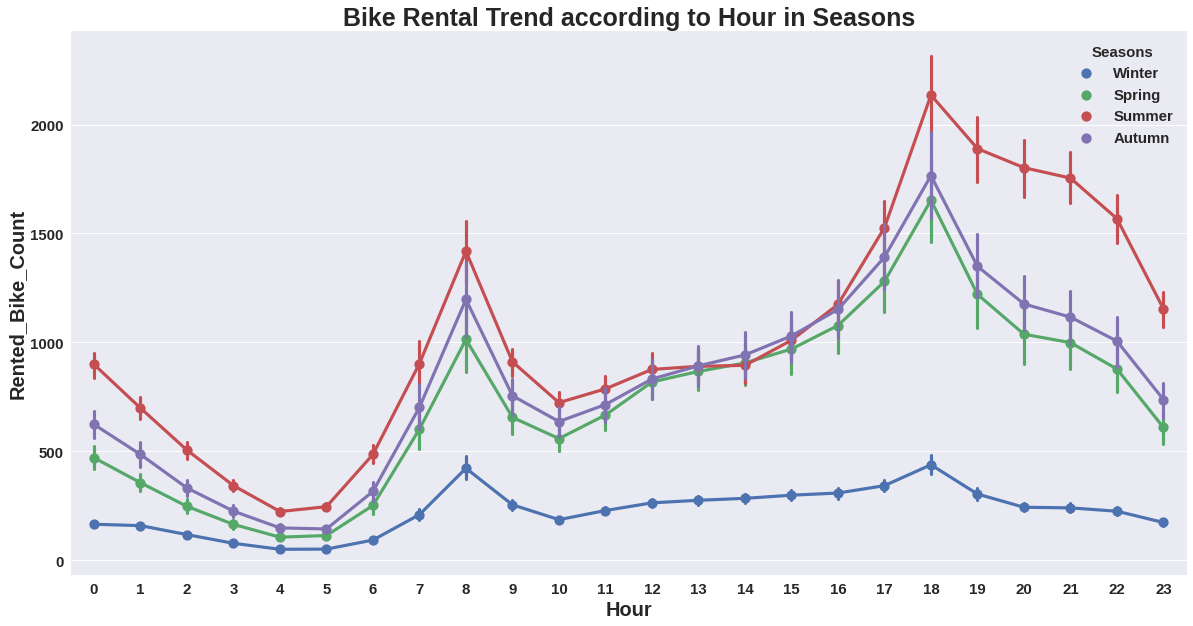

In [28]:
## Bike Rent Count trend with respect Hours on Seasons.
plt.figure(figsize=(20,10))
sns.pointplot(x=bike_df['Hour'],y=bike_df['Rented_Bike_Count'],hue=bike_df['Seasons'])
plt.title("Bike Rental Trend according to Hour in Seasons")

Text(0.5, 1.0, 'Bike Rental Trend according to Hour in different months')

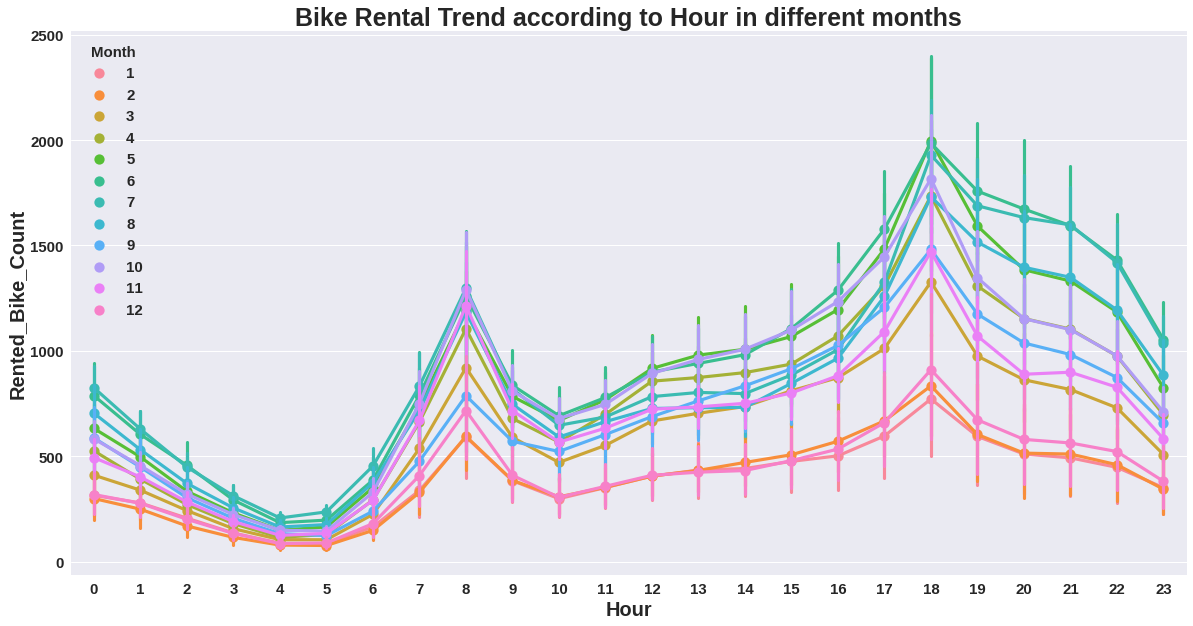

In [29]:
## Bike Rent Count trend with respect Hours on Months
plt.figure(figsize=(20,10))
sns.pointplot(x=bike_df['Hour'],y=bike_df['Rented_Bike_Count'],hue=bike_df['Month'])
plt.title("Bike Rental Trend according to Hour in different months")

Text(0.5, 1.0, 'Bike Rental Trend according to Hour in Weekdays_or_weekend.')

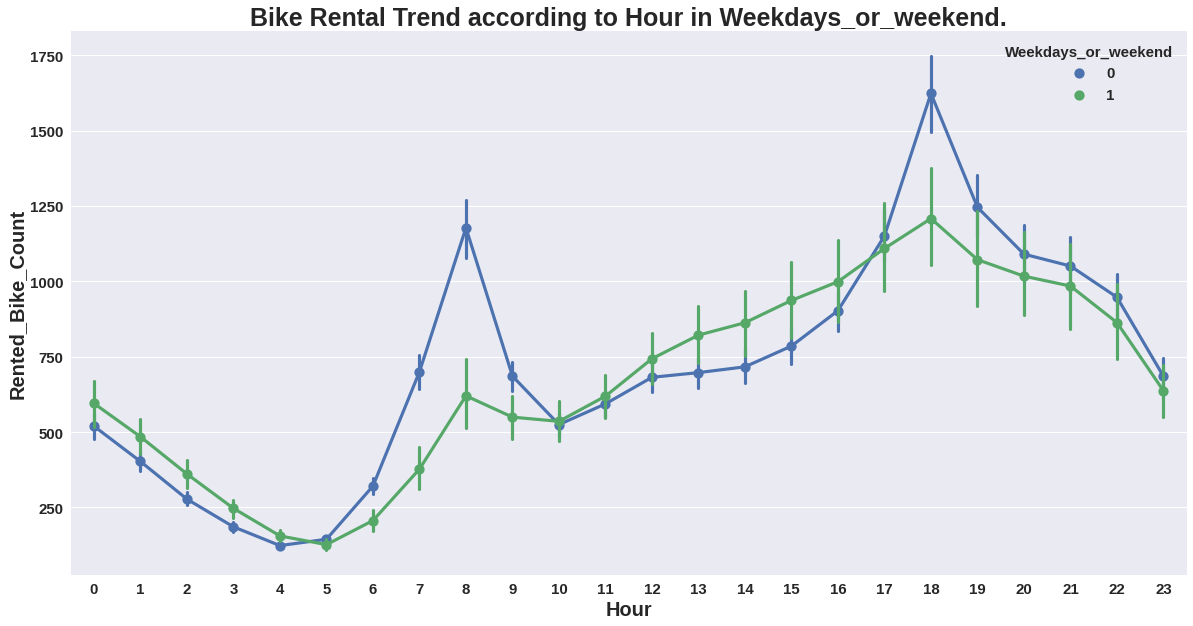

In [30]:
## Bike Rent Count trend with respect Hours on Weekdays or weekends
plt.figure(figsize=(20,10))
sns.pointplot(x=bike_df['Hour'],y=bike_df['Rented_Bike_Count'],hue=bike_df['Weekdays_or_weekend'])
plt.title("Bike Rental Trend according to Hour in Weekdays_or_weekend.")
# 0= weekdays
#1= weekend


##**Let's check distribution of target variable- "Bike Rented Count"**

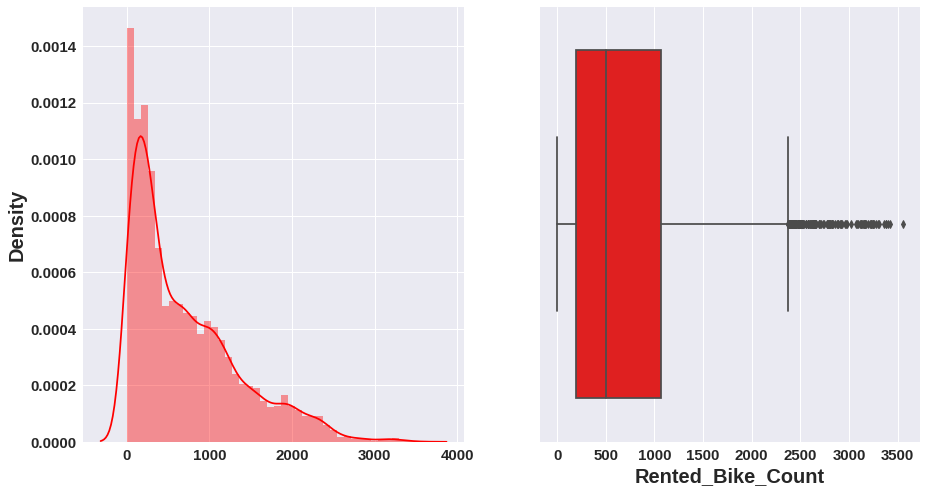

In [31]:
# plotting subplots
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x=bike_df['Rented_Bike_Count'],color='red',ax=axes[0])
# plt.figure(figsize=(15,8))
sns.boxplot(x=bike_df['Rented_Bike_Count'],color='red',ax=axes[1])

In [32]:
###  Our target varibale's distribution is slightly right skewed. 

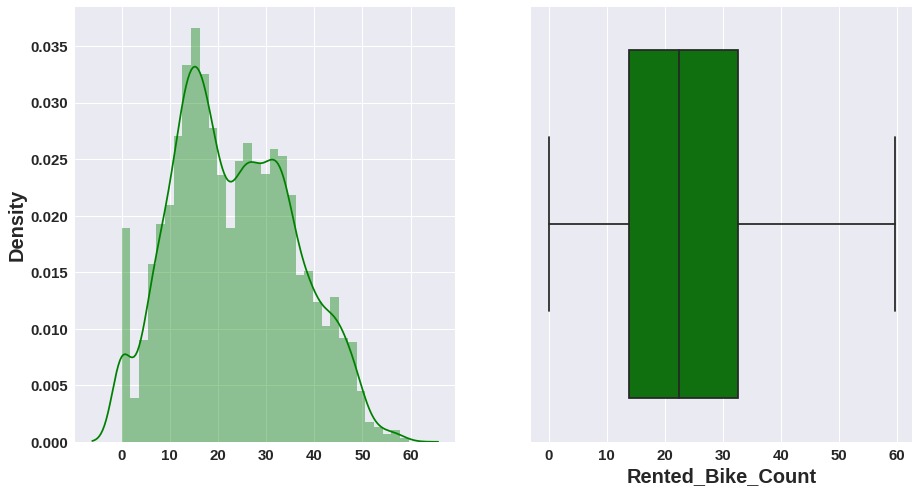

In [33]:
# Normalizing  our target variable by squre root method

f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x=np.sqrt(bike_df['Rented_Bike_Count']),color='g',ax=axes[0])
sns.boxplot(x=np.sqrt(bike_df['Rented_Bike_Count']),color='g',ax=axes[1])

Thus we normalized our dependent variable by square root method and also in boxplot we can see there are no outliers present.

## **Let's check distribution of independent variables**

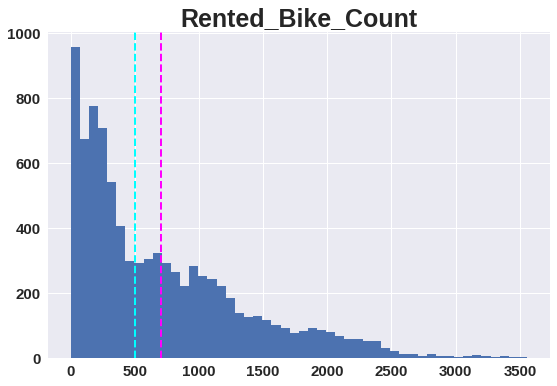

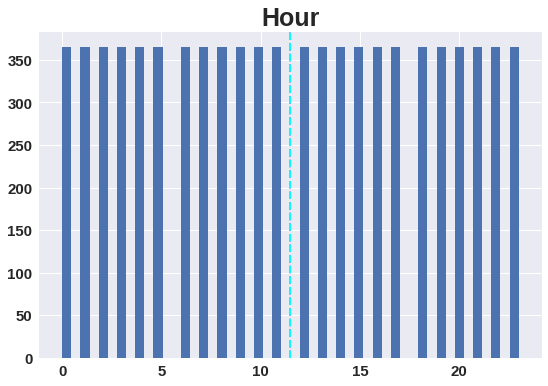

In [ ]:
# Plot  a histogram graph to check where mean and medians are lying in the distribution and the data points in variables are distributed.

for col in numeric_col:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [ ]:
# Normalizing The variables using squre root method.
for col in numeric_col:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.sqrt(bike_df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()


## **Lets check the relationship between the dependent variable-"Rented Bike Count'and remaining columns(independent variable).**

In [ ]:
for col in numeric_col:
  plt.figure(figsize=(14,8))
  ax=fig.gca()
  sns.regplot(x=bike_df[col],y=bike_df['Rented_Bike_Count'],scatter_kws={'color':'green'},line_kws={'color':'black'})

## **Hour:**
 #### 1)There is sudden peak between 6/7AM to 10 AM. Office time,College and going time could be the reason for this sudden peak.
 #### 2) Again there is peak between 10 AM to 7 PM. may be its office leaving time for the above people.
  #### 3) We can say that,from morning 7 AM to Evening 7 PM we have good Bike Rent Count. and from 7 PM to 7 AM Bike Rent count starts declining.

## **Temperature:**
####1) For decrease in temperature below 0 deg celicus the bike rent count is significantly decreased because may be people dont want to ride bike in such cold temperature.
####2) But for normal temperature the Bike rent count is very high.

## **humidity**
####1) Here its seems like humidty is inversely proportional to bike rent count. As humdity percentage is increasing there is decrease in bike rent count.

## **Wind Speed:**
####1) upto wind speed 4 m/s there is good bike rent count.

## **Visibility**
####1) It's very obivious that as visibilty increases the bike rent count also increases. Nobody would prefere to ride in low visibilty.

## **Dew Point Temperature**
####1)It's again the same case as of temperature. As dew temperature goes below 0 deg celcius there is less bike rent count. It looks like Dew Point temperature and Temperature columns have strong colinarity.

## **Solar radiation**
####1)Here the amount of rented bikes is huge, when there is solar radiation.

## **Rainfall And snowfall**
####1) Its very obivious that people usually do not like ride bikes in rain and snowfall.


## **Checking Corelation between dependent and independent variable.**

In [ ]:
plt.figure(figsize=(20,8))
corr=bike_df.corr()
sns.heatmap(data=abs(corr),annot=True,cmap='coolwarm')

### Temperature and Dew point Temperature are highly correlated.

### As per our regression assumption, there should not be colinearity between independent variables.
### We can see from the heatmap that "Temperature" and "Dew Point Temperature" are highly corelated. We can drop one of them.As the corelation between temperature and our dependent variable "Bike Rented Count" is high. So we will Keep the Temperature column and drop the "Dew Point Temperature" column.
### And also we dropping "Date" column as its not useful for us(as we have created the month, weekdays and weekend columns.

In [ ]:
# make copy of dataset

df=bike_df.copy()

# **Modeling**

## ***Lets Prepare data for modeling***

In [ ]:
df.head(1)

In [ ]:
# Since Temperature and Dew point temperature are corelated with each other. We will drop dew point temperature.
df.drop('Dew_point_temperature',inplace=True,axis=1)

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def Calculate_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count']]])

humidity vif is greater than 5 so we will remove that column. 

In [ ]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count','Humidity']]])

humidity vif is greater than 5 so we will remove that column.

In [ ]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count','Humidity','Visibility']]])

Now we have VIF values in the range of 1 to 5. we will drop 'Humidity','Visibility' this columns from our dataset

In [ ]:
# As per above vif calculation dropping humidity and visibility columns.
df.drop(['Humidity','Visibility'],inplace=True,axis=1)

In [ ]:
# checking categoiries in season column.
df['Seasons'].value_counts()

In [ ]:
# Createing dummy variables
df=pd.get_dummies(df,columns=['Seasons'],prefix='Seasons',drop_first=True)


In [ ]:
# checking categoiries in holiday columns.
df['Holiday'].value_counts()

In [ ]:
# Labeling for holiday=1 and no holiday=0
df['Holiday']=df['Holiday'].map({'No Holiday':0, 'Holiday':1})

In [ ]:
# # Labeling for Yes=1 and no No=0
df['Functioning_Day']=df['Functioning_Day'].map({'Yes':1, 'No':0})

In [ ]:
# checking dummy and labled columns
df.head(3)


In [ ]:
# final info before going for modeling
df.info()

# **Linear Regression**

In [ ]:
# lets import train test split for splitting the data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

In [ ]:
# Define X-variable(Independent Variables) and Y-Variable(Dependent Variable)
X=df.drop('Rented_Bike_Count',axis=1)
y=np.sqrt(df['Rented_Bike_Count'])

In [ ]:
# Split data into train test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [ ]:
# Transforming data 
# Here if you don't apply scaling still we will get almost similar results.
# for its a good practice to apply scaling to the linear regression models.
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [ ]:

# Checking shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
# Taking instance
l_reg=LinearRegression()
# fitting the model and trainig
l_reg.fit(X_train,y_train)

In [ ]:
# Cheeck coefficents
l_reg.coef_

In [ ]:
# get dataframe for x columns and coefficient
pd.DataFrame(l_reg.coef_,X.columns, columns=['Coefficient'])

In [ ]:

# Check intercept
l_reg.intercept_

In [ ]:
#Checking score
l_reg.score(X_train,y_train)

In [ ]:
# Y peredictions on train data
y_pred_train=l_reg.predict(X_train)

# y predictions on test data
y_pred=l_reg.predict(X_test)

In [ ]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

Saving train data set results in dataframe.

In [ ]:
#Saving train data set results in dataframe.
train_dict={'Model':"Linear Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [ ]:
# create training_result dataframe
traing_results_df=pd.DataFrame(train_dict,index=[1])
traing_results_df

### Evaluation of Test data set

In [ ]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

In [ ]:
# saving test result in dictionary.
test_dict={'Model':"Linear Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [ ]:
# create test_result dataframe
test_results_df=pd.DataFrame(test_dict,index=[1])
test_results_df

On testing data R2 score is 0.6183 which is almost close to training data R2 score.Hence we can say that our model performance is good and overfitting is not observed. We need to improve our model performance.

In [ ]:
# define a fucntion to plot predicted y values and actual y values
def plot_Pred_vs_actual(y_pred,y_test):
  ''' Visualize predicted values with actaul values'''
  plt.figure(figsize=(20,8))
  plt.plot(y_pred)
  plt.plot(np.array(y_test))
  plt.legend(["Predicted","Actual"],)
  plt.title("Predicted V/S Actual")
  plt.show()

In [ ]:
# define a function to plot scatter plot for y_test and y_actual.
def plot_scatter(y_pred,y_test):
  '''Plot scatter plot for y_test values and 
  y_test values. To check how close we are to regresson line'''
  plt.figure(figsize=(16,5))
  sns.regplot(x=y_test,y=y_pred,scatter_kws={'color':'magenta'},line_kws={'color':'black'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")


In [ ]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed).
 #Mean of residuals should be zero or close to 0 as much as possible. It is done to check whether our line is actually the line of “best fit” 
def Residual_distPlot(y_pred,y_test):  
  '''Checks the distribution of residals)'''        
                                                    
  plt.figure(figsize=(10,5))
  sns.distplot(x=y_test-y_pred)

  plt.title("Residual Distribution")


In [ ]:
plot_Pred_vs_actual(y_pred,y_test)


In [ ]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

In [ ]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

In [ ]:
Residual_distPlot(y_pred,y_test)

#Lasso

In [ ]:
# instantiating
lasso_reg=Lasso(alpha=0.01)

In [ ]:
# Fitting and training the model
lasso_reg.fit(X_train,y_train)

In [ ]:
# Check coefficient
lasso_reg.coef_

In [ ]:
# get dataframe of x columns and Coeficients
pd.DataFrame(lasso_reg.coef_,X.columns,columns=['Coeficients']).reset_index().rename(columns={'index':'X'})

In [ ]:
# Check score on train dataset
lasso_reg.score(X_train,y_train)

In [ ]:
# Check score on test dataset
lasso_reg.score(X_test,y_test)

In [ ]:
# Check intercept
lasso_reg.intercept_

In [ ]:
# y prdiction on train data
y_pred_train=lasso_reg.predict(X_train)
# y prdiction on test data
y_pred=lasso_reg.predict(X_test)

### Evaluation On Train Data.

In [ ]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

In [ ]:
# Create train results dictionary
train_dict={'Model':"Lasoo",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}


In [ ]:

# appending train result to training result dataframe
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df



###Evaluation On Test Data.

In [ ]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

In [ ]:

# Create test results dictionary
test_dict={'Model':"Lasso",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [ ]:
# appending test result to test result dataframe
test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

In [ ]:
plot_Pred_vs_actual(y_pred,y_test)

In [ ]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

In [ ]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

In [ ]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)

Residual_distPlot(y_pred,y_test)

# Ridge

In [ ]:


# instantiating
ridge_lg=Ridge(alpha=0.1)
# fitting and training
ridge_lg.fit(X_train,y_train)

In [ ]:
# check coefficient
ridge_lg.coef_

In [ ]:
# get dataframe for x columns and coeff
pd.DataFrame(ridge_lg.coef_,X.columns,columns=['Coefficients'])

In [ ]:
# Check intercept
ridge_lg.intercept_

In [ ]:
# y predictions on training dataset
y_pred_train_ridge=ridge_lg.predict(X_train)
# y predictions on test dataset
y_pred_ridge=ridge_lg.predict(X_test)

### Evaluation On Train Data.

In [ ]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

In [ ]:
train_dict={'Model':"Ridge GridSearchCV",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}



In [ ]:
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df



### Evaluation On Test Data.

In [ ]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

In [ ]:
test_dict={'Model':"Ridge(GridsearchCv Tunned)",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [ ]:
test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

In [ ]:
plot_Pred_vs_actual(y_pred,y_test)

In [ ]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

In [ ]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

In [ ]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)
Residual_distPlot(y_pred,y_test)

In [ ]:
# importing gridsearchcv for hyper parameter tuning
from sklearn.model_selection  import GridSearchCV

### GreadSearchCV on Ridge

In [ ]:
# cross validation on Ridge regression
# creating object
ridge_reg=Ridge()

# alphas values's dictionary to pass on in Gridsearchcv 
alphas = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}

ridge_linear_reg = GridSearchCV(ridge_reg, alphas, scoring='neg_mean_squared_error', cv=4)
# fitting model
ridge_linear_reg.fit(X_train, y_train)


* Here, α (alpha) is the parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients. α can take various values:

* α = 0:
The objective becomes same as simple linear regression.
We’ll get the same coefficients as simple linear regression.
* α = ∞:
The coefficients will be zero. Why? Because of infinite weightage on square of coefficients, anything less than zero will make the objective infinite.
* 0 < α < ∞:
The magnitude of α will decide the weightage given to different parts of objective.
The coefficients will be somewhere between 0 and ones for simple linear regression.

In [ ]:
# Since it showing best parameter alpha= 1.. alpha =1 means it will be as linear regression.
print(f'The best alpha value is {ridge_linear_reg.best_params_}')
print(f'The best negative mean squred error value is {ridge_linear_reg.best_score_}')


best params are applied on the above ridge model.
(Score on ridge is after hyperparameter tuning.)


# ElasticNet

In [ ]:
# creating object of elastic net
elastic_net_reg=ElasticNet(alpha=0.001,l1_ratio=0.5)
elastic_net_reg.fit(X_train,y_train)

In [ ]:
# Check score on train data
elastic_net_reg.score(X_train,y_train)

In [ ]:
# check score on test data
elastic_net_reg.score(X_test,y_test)

In [ ]:
# predicting Y train values from train data set
y_pred_train=elastic_net_reg.predict(X_train)
# predicting y values from test data
y_pred=elastic_net_reg.predict(X_test)

In [ ]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

In [ ]:
train_dict={'Model':"ElasticNet(GridSearchCV-Tunned)",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}


In [ ]:
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

In [ ]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

In [ ]:


test_dict={'Model':"ElasticNet(GridSearchCV-Tunned)",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}




In [ ]:
test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

In [ ]:
# Cross validation

elastic = ElasticNet()
alpha_l1 = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
elastic_regressor = GridSearchCV(elastic, alpha_l1, scoring='neg_mean_squared_error',cv=4)
elastic_regressor.fit(X_train, y_train)

In [ ]:
# print best parameters and best score
print(f'The best alpha value is {elastic_regressor.best_params_}')
print(f'The best negative mean squred error value is {elastic_regressor.best_score_}')


L1_ratio
* Its range is 0 < = l1_ratio < = 1. 
*If l1_ratio = 1, the penalty would be L1 penalty. 
*If l1_ratio = 0, the penalty would be an L2 penalty. 
*If the value of l1 ratio is between 0 and 1, the penalty would be the combination of L1 and L2.

In [ ]:
# plotting predicted v/s actual
plot_Pred_vs_actual(y_pred,y_test)

In [ ]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

In [ ]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

In [ ]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)
Residual_distPlot(y_pred,y_test)

As We have saw in linear regression,lasso,ridge and elastic net we are getting almost similar r2 scores.

# *Decision Tree Regressor*

In [ ]:
#import decsion tree packages
from sklearn.tree import DecisionTreeRegressor

# create an object
D_tree=DecisionTreeRegressor(max_depth=9,splitter='best',max_features='auto')

# fitting Xtrain yTrain
D_tree.fit(X_train,y_train)

In [ ]:
# Check score on Train dataset
D_tree.score(X_train,y_train)

In [ ]:
# check score on Test dataset.
D_tree.score(X_test,y_test)

In [ ]:
#  predicting y_train_predictions from  X train values
y_pred_train=D_tree.predict(X_train)
#  predicting y_predictions from  X test values
y_pred=D_tree.predict(X_test)

In [ ]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

In [ ]:
# creating dictionary  of Decison tree results( Train dataset)
train_dict={'Model':"Decision Tree Regressor-GridSearchCV",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}


In [ ]:
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

In [ ]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

In [ ]:

test_dict={'Model':"Decision Tree Regressor(GridsearchCV)",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}




In [ ]:
test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

In [ ]:
plot_Pred_vs_actual(y_pred,y_test)

In [ ]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

In [ ]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

In [ ]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)
Residual_distPlot(y_pred,y_test)

# Hyperparameter Tuning

In [ ]:
# Hyper parameters range intialization for tuning 
tree=DecisionTreeRegressor()
parameters={'criterion': ["mae"],
            "splitter":["best","random"],
            "max_depth" : [3,5,7,9,None],
           "max_features":["auto","log2"] }

In [ ]:
tuning_model=GridSearchCV(tree,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=0)
tuning_model.fit(X_train,y_train)


In [ ]:
tuning_model.best_params_

In [ ]:

D_tree=DecisionTreeRegressor(max_depth=9,max_features='auto',splitter='best')
D_tree.fit(X_train,y_train)

In [ ]:
imp_variables=X.columns
importances = D_tree.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Decision Tree-GridSearchCV')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

We have applied this best parametrs to above Decsion tree regressor model

#Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

In [ ]:
rf.score(X_train,y_train)

In [ ]:
rf.score(X_test,y_test)

In [ ]:
y_pred_train=rf.predict(X_train)
y_pred=rf.predict(X_test)

In [ ]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

In [ ]:
train_dict={'Model':"Random Forest",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}




traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df


In [ ]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

In [ ]:
test_dict={'Model':"Radom forest",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}


test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

#GridSearchCV On random Forest

In [ ]:
param={'n_estimators':[25,50,40,80,100],'max_depth':[3,4,5,6,7,8,9]}

In [ ]:

rf_reg=RandomForestRegressor()
rf_tuning=GridSearchCV(rf_reg,param_grid=param,scoring='neg_mean_squared_error',cv=5)
rf_tuning.fit(X_train,y_train)

In [ ]:
rf_tuning.best_params_

In [ ]:
rf=RandomForestRegressor(max_depth=9,n_estimators=100)
rf.fit(X_train,y_train)

In [ ]:

rf.score(X_train,y_train)

In [ ]:

rf.score(X_test,y_test)

In [ ]:
y_pred_train=rf.predict(X_train)
y_pred=rf.predict(X_test)

In [ ]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

In [ ]:
train_dict={'Model':"Random Forest-GridSearchCv",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}




traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df


In [ ]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

In [ ]:
test_dict={'Model':"Random Forest-GridSearchCv",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}


test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

In [ ]:
plot_Pred_vs_actual(y_pred,y_test)

In [ ]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

In [ ]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

In [ ]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)

Residual_distPlot(y_pred,y_test)

In [ ]:
imp_variables=X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Random Forest)')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

##By looking at the graph we can say that temperature and hours plays very important role on bike rentals.

# Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gradboo_reg=GradientBoostingRegressor()
gradboo_reg.fit(X_train,y_train)

In [ ]:
gradboo_reg.score(X_train,y_train)

In [ ]:
gradboo_reg.score(X_test,y_test)

In [ ]:
y_pred_train=gradboo_reg.predict(X_train)
y_pred=gradboo_reg.predict(X_test)

In [ ]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

In [ ]:
train_dict={'Model':"Gardient boosting Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}




traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df


In [ ]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

In [ ]:

test_dict={'Model':"Gradient Boosting Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}


test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

In [ ]:
plot_Pred_vs_actual(y_pred,y_test)

In [ ]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

In [ ]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

In [ ]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)
Residual_distPlot(y_pred,y_test)

#GridSearchCV on Gradient Boosting Regressor

In [ ]:
gbr=GradientBoostingRegressor()

In [ ]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [50,80,100,150],
                  'max_depth'    : [4,6,8,10]
                 }


                 
# 1)n_estimators : The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
# 2)learning_rate:Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.
# 3)max_depth : Maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; 
#the best value depends on the interaction of the input variables.

#4)subsample, default=1.0
#The fraction of samples to be used for fitting the individual base learners. 
#If smaller than 1.0 this results in Stochastic Gradient Boosting. 
#subsample interacts with the parameter n_estimators. 
#Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias.

In [ ]:
#Gridsearch
grad_boo_tuning=GridSearchCV(gbr,param_grid=parameters,cv=4,n_jobs=1)
# fitting gridsearc on xtrain and ytrain
grad_boo_tuning.fit(X_train,y_train)


In [ ]:
# get best paramters to use
grad_boo_tuning.best_params_

In [ ]:
  # USing best paramters tunned by GridsearchCv 
  gradboo_tuned=GradientBoostingRegressor(learning_rate=0.04,max_depth=8,n_estimators=150,subsample=0.9)
  gradboo_tuned.fit(X_train,y_train)

In [ ]:
  # checking score on train data
  gradboo_tuned.score(X_train,y_train)


In [ ]:
#checking score on test data
gradboo_tuned.score(X_test,y_test)

In [ ]:
# predicting y values of train and test data.
#  y preidictions on train data.
y_pred_train=gradboo_tuned.predict(X_train)
# y predictions on test data
y_pred=gradboo_tuned.predict(X_test)

In [ ]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

In [ ]:
train_dict={'Model':"Gradient Boosting Regression(GridSearchCV)",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}




traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

In [ ]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

In [ ]:

test_dict={'Model':"Gradient Boosting Regression(GridSearchCV)",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}


test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

In [ ]:
plot_Pred_vs_actual(y_pred,y_test)

In [ ]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

In [ ]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

In [ ]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)

Residual_distPlot(y_pred,y_test)

Here we got very nice bell shaped curve of the residuals.

In [ ]:
# checking Feature imporatance
imp_variables=X.columns
importances = gradboo_tuned.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Gradient Boosting-GridSearchCV')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

In [ ]:
# Check Final dataframe of All models
final_result=pd.concat([traing_results_df,test_results_df],keys=['Training set','Test set'])
final_result

#Conclusions:

* #### As we have calculated MAE,MSE,RMSE and R2 score for each model. Based on r2 score will decide our model performance.
* #### Our assumption: if the differnece of R2 score between Train data and Test is more than 5 % we will consider it as overfitting. 

# Linear,Lasso,Ridge and ElasticNet.

>* #### 1)From The above data frame, we can see that linear,Lasso,Ridge  and Elastic  regression models have almost similar R2 scores(61%) on both training and test data.(Even after using GridserachCV we have got similar results as of base models).
 
# Decision Tree Regressor:
> * #### On Decision tree regressor model, without hyperparameter tuning we got r2 score as 100% on training data and on test data it was very less. Thus our model memorised the data.So it was a overfitted model.
* #### After hyperparameter tuning we got r2 score as 88% on training data and 83% on test data which is quite good for us.

# Random Forest:

> * #### On Random Forest regressor model, without hyperparameter tuning we got r2 score as 98% on training data and 90% on test data. Thus our model memorised the data.So it was a overfitted model, as per our assumption
* #### After hyperparameter tuning we got r2 score as 90% on training data and 87% on test data which is  very good for us.
# Gradient Boosting Regression(Gradient Boosting Machine):

> * #### On Random Forest regressor model, without hyperparameter tuning we got r2 score as 86% on training data and 85% on test data.Our model performed well without hyperparameter tuning.
* #### After hyperparameter tuning we got r2 score as 96% on training data and 91% on test data,thus we improved the model performance by hyperparameter tuning.

> * ## Thus Gradient Boosting Regression(GridSearchCV) and Random forest(gridSearchCv) gives good r2 scores. We can deploy this models.

### In terms of features, Temperature and Hours plays very important role in  following 3 models. Other features importances are different in 3 models.
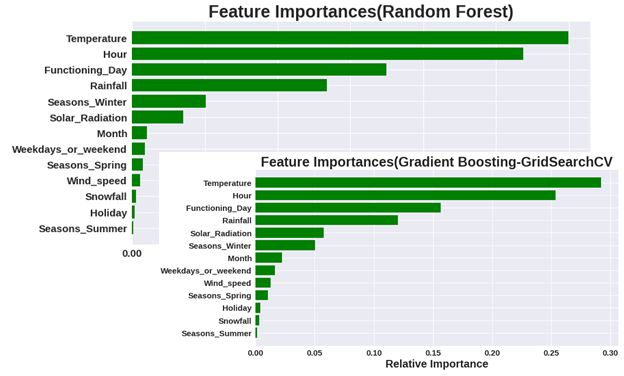
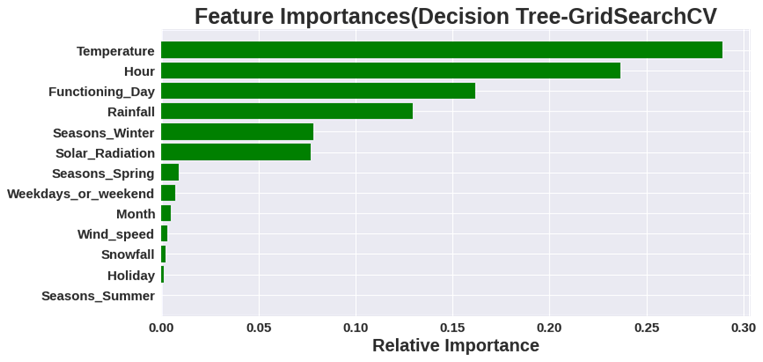